In [1]:
#The project name is "Sales Performance & Customer Segmentation" 
!pip install faker
import pandas as pd
import numpy as np
import random
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Python code to generate the dataset

# Initializes the faker object to generate fake data
fake = Faker()
Faker.seed(42)
np.random.seed(42)

# Define constants
provinces = ['ON', 'QC', 'BC', 'AB', 'MB', 'NS', 'NB', 'NL', 'PE', 'SK']
categories = {
    'Electronics': ['Smartphone', 'Laptop', 'Headphones', 'Monitor'],
    'Apparel': ['Jeans', 'T-shirt', 'Sneakers', 'Jacket'],
    'Home': ['Sofa', 'Coffee Table', 'Lamp', 'Bed']
}

num_records = 1000

data = []

for i in range(num_records):
    invoice_id = f"INV{100000 + i}"
    customer_id = f"CUST{random.randint(1000, 9999)}"
    invoice_date = fake.date_time_between(start_date='-6M', end_date='now')
    province = random.choice(provinces)
    category = random.choice(list(categories.keys()))
    product = random.choice(categories[category])
    quantity = random.randint(1, 5)
    unit_price = round(random.uniform(10.0, 500.0), 2)
    total_price = round(quantity * unit_price, 2)

    data.append([
        invoice_id, customer_id, invoice_date, province,
        category, product, quantity, unit_price, total_price
    ])

# Create DataFrame
columns = ['InvoiceID', 'CustomerID', 'InvoiceDate', 'Province',
           'Category', 'ProductName', 'Quantity', 'UnitPrice', 'TotalPrice']

df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv('canadian_retail_sales.csv', index=False, encoding='utf-8')
print("Custom Canadian sales dataset created and saved as 'canadian_retail_sales.csv'")

Custom Canadian sales dataset created and saved as 'canadian_retail_sales.csv'


In [3]:
df.head(10)

,InvoiceID,CustomerID,InvoiceDate,Province,Category,ProductName,Quantity,UnitPrice,TotalPrice
0,INV100000,CUST3435,2025-05-01 12:46:19,NB,Home,Bed,2,387.72,775.44
1,INV100001,CUST4652,2025-01-18 23:40:03,MB,Home,Bed,1,45.89,45.89
2,INV100002,CUST2155,2025-01-02 05:23:08,AB,Electronics,Smartphone,4,367.43,1469.72
3,INV100003,CUST4256,2025-05-21 08:42:10,ON,Home,Sofa,2,141.21,282.42
4,INV100004,CUST5135,2025-02-19 18:33:24,MB,Apparel,T-shirt,3,23.95,71.85
5,INV100005,CUST7036,2025-02-13 22:06:21,NL,Electronics,Laptop,4,77.95,311.80
6,INV100006,CUST1949,2025-02-09 17:03:52,SK,Home,Sofa,5,358.43,1792.15
7,INV100007,CUST8355,2025-01-24 11:07:15,BC,Apparel,Jeans,5,479.06,2395.30
8,INV100008,CUST2041,2025-05-20 09:01:54,AB,Home,Bed,3,89.24,267.72
9,INV100009,CUST9313,2025-01-17 06:29:21,BC,Electronics,Headphones,5,228.66,1143.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceID    1000 non-null   object        
 1   CustomerID   1000 non-null   object        
 2   InvoiceDate  1000 non-null   datetime64[ns]
 3   Province     1000 non-null   object        
 4   Category     1000 non-null   object        
 5   ProductName  1000 non-null   object        
 6   Quantity     1000 non-null   int64         
 7   UnitPrice    1000 non-null   float64       
 8   TotalPrice   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

InvoiceID      0
CustomerID     0
InvoiceDate    0
Province       0
Category       0
ProductName    0
Quantity       0
UnitPrice      0
TotalPrice     0
dtype: int64

In [6]:
df.dtypes

InvoiceID              object
CustomerID             object
InvoiceDate    datetime64[ns]
Province               object
Category               object
ProductName            object
Quantity                int64
UnitPrice             float64
TotalPrice            float64
dtype: object

In [7]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

df = df.drop_duplicates()

Duplicate rows: 0


In [8]:
print(df['Quantity'].describe())
print(df['UnitPrice'].describe())

count    1000.000000
mean        2.906000
std         1.407532
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Quantity, dtype: float64
count    1000.000000
mean      260.203130
std       142.803056
min        11.850000
25%       137.827500
50%       268.945000
75%       380.012500
max       499.670000
Name: UnitPrice, dtype: float64


In [9]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceID     1000 non-null   object        
 1   CustomerID    1000 non-null   object        
 2   InvoiceDate   1000 non-null   datetime64[ns]
 3   Province      1000 non-null   object        
 4   Category      1000 non-null   object        
 5   ProductName   1000 non-null   object        
 6   Quantity      1000 non-null   int64         
 7   UnitPrice     1000 non-null   float64       
 8   TotalPrice    1000 non-null   float64       
 9   InvoiceMonth  1000 non-null   period[M]     
 10  Month         1000 non-null   int32         
 11  Year          1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(5), period[M](1)
memory usage: 86.1+ KB


,InvoiceID,CustomerID,InvoiceDate,Province,Category,ProductName,Quantity,UnitPrice,TotalPrice,InvoiceMonth,Month,Year
0,INV100000,CUST3435,2025-05-01 12:46:19,NB,Home,Bed,2,387.72,775.44,2025-05,5,2025
1,INV100001,CUST4652,2025-01-18 23:40:03,MB,Home,Bed,1,45.89,45.89,2025-01,1,2025
2,INV100002,CUST2155,2025-01-02 05:23:08,AB,Electronics,Smartphone,4,367.43,1469.72,2025-01,1,2025
3,INV100003,CUST4256,2025-05-21 08:42:10,ON,Home,Sofa,2,141.21,282.42,2025-05,5,2025
4,INV100004,CUST5135,2025-02-19 18:33:24,MB,Apparel,T-shirt,3,23.95,71.85,2025-02,2,2025


In [11]:
df.to_csv('cleaned_canadian_retail_sales.csv', index=False)
print("Cleaned dataset saved as 'cleaned_canadian_retail_sales.csv'")

Cleaned dataset saved as 'cleaned_canadian_retail_sales.csv'


In [12]:
df = pd.read_csv('cleaned_canadian_retail_sales.csv')

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $760,521.63


In [15]:
unique_customers = df['CustomerID'].nunique()
print(f"👥 Unique Customers: {unique_customers}")

👥 Unique Customers: 947


In [16]:
aov = df.groupby('InvoiceID')['TotalPrice'].sum().mean()
print(f"🧾 Average Order Value: ${aov:,.2f}")

🧾 Average Order Value: $760.52


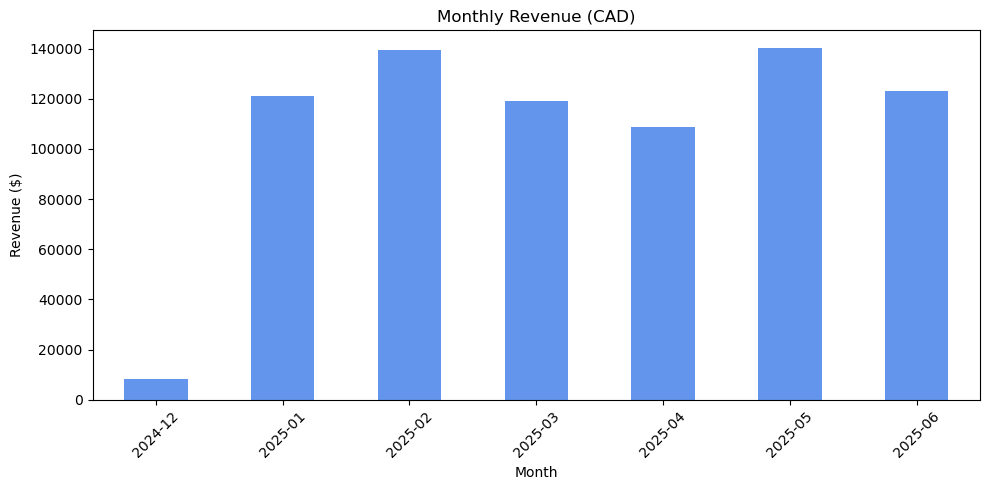

In [17]:
# Group by month
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

# Plot
monthly_sales.plot(kind='bar', figsize=(10,5), title='Monthly Revenue (CAD)', color='cornflowerblue')
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

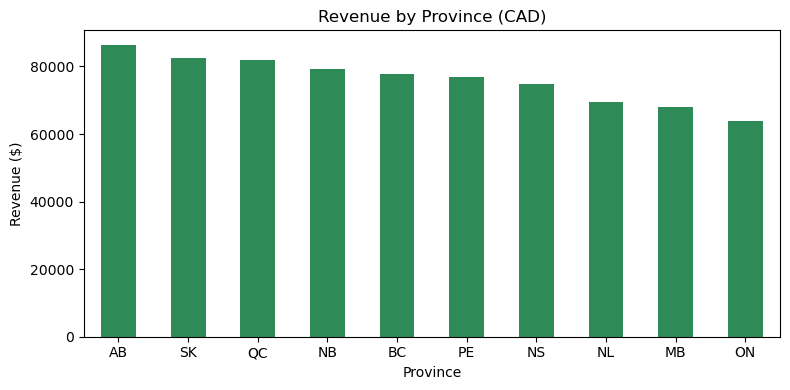

In [18]:
province_sales = df.groupby('Province')['TotalPrice'].sum().sort_values(ascending=False)

# Plot
province_sales.plot(kind='bar', figsize=(8,4), title='Revenue by Province (CAD)', color='seagreen')
plt.ylabel("Revenue ($)")
plt.xlabel("Province")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

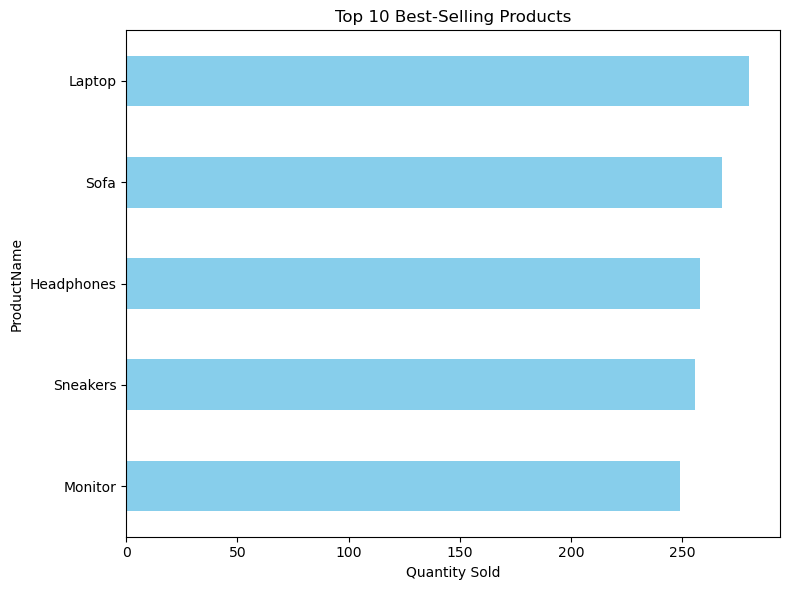

In [19]:
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)

# Plot
top_products.plot(kind='barh', title='Top 10 Best-Selling Products', figsize=(8,6), color='skyblue')
plt.xlabel("Quantity Sold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

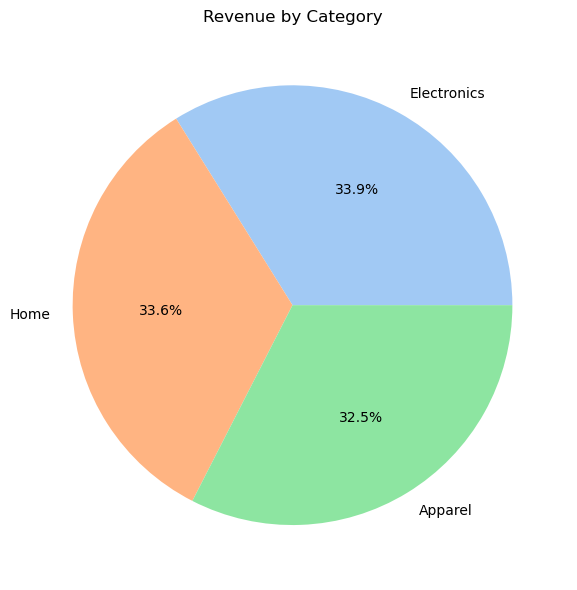

In [20]:
category_revenue = df.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)

# Plot
category_revenue.plot(kind='pie', autopct='%1.1f%%', title='Revenue by Category', figsize=(6,6), colors=sns.color_palette('pastel'))
plt.ylabel("")
plt.tight_layout()
plt.show()

In [36]:
df = pd.read_csv('cleaned_canadian_retail_sales.csv')

In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [39]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceID': 'nunique',
    'TotalPrice': 'sum'
})

In [40]:
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceID': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

In [41]:
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
CUST1000        125          1    366.74
CUST1019        156          1   1114.50
CUST1042        131          1     73.94
CUST1045        125          1   1436.34
CUST1064        161          1    766.25


In [53]:
pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

CustomerID
CUST1000    2
CUST1019    1
CUST1042    2
CUST1045    2
CUST1064    1
           ..
CUST9941    2
CUST9965    1
CUST9983    4
CUST9984    2
CUST9986    3
Name: Recency, Length: 947, dtype: int32

In [54]:
pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

CustomerID
CUST1000    1
CUST1019    1
CUST1042    1
CUST1045    1
CUST1064    1
           ..
CUST9941    5
CUST9965    5
CUST9983    5
CUST9984    5
CUST9986    5
Name: Frequency, Length: 947, dtype: int32

In [55]:
pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

CustomerID
CUST1000    2
CUST1019    4
CUST1042    1
CUST1045    5
CUST1064    3
           ..
CUST9941    4
CUST9965    4
CUST9983    4
CUST9984    5
CUST9986    3
Name: Monetary, Length: 947, dtype: int32

In [61]:
# Combine the RFM scores into a single string
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [62]:
# Calculate an overall RFM score (optional, useful for ranking)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [63]:
print(rfm.head())

            Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
CUST1000        125          1    366.74        2        1        2   
CUST1019        156          1   1114.50        1        1        4   
CUST1042        131          1     73.94        2        1        1   
CUST1045        125          1   1436.34        2        1        5   
CUST1064        161          1    766.25        1        1        3   

           RFM_Segment  RFM_Score  
CustomerID                         
CUST1000           212          5  
CUST1019           114          6  
CUST1042           211          4  
CUST1045           215          8  
CUST1064           113          5  


In [66]:
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champion'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 3:
        return 'Loyal Customer'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 2:
        return 'Potential Loyalist'
    elif row['R_Score'] >= 4:
        return 'Recent Customer'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 4:
        return 'At Risk'
    elif row['R_Score'] == 1 and row['F_Score'] == 1:
        return 'Lost'
    else:
        return 'Others'

# Apply segmentation
rfm['CustomerCategory'] = rfm.apply(segment_customer, axis=1)

# Show segment counts
print(rfm['CustomerCategory'].value_counts())

CustomerCategory
Potential Loyalist    236
Others                217
At Risk               155
Loyal Customer        141
Champion               80
Recent Customer        71
Lost                   47
Name: count, dtype: int64


In [76]:
# Save selected columns to a CSV for Tableau
rfm_for_tableau = rfm.reset_index()[[
    'CustomerID', 'Recency', 'Frequency', 'Monetary',
    'R_Score', 'F_Score', 'M_Score',
    'RFM_Segment', 'RFM_Score', 'CustomerCategory'
]]

In [71]:
rfm_for_tableau.to_csv('rfm_customer_segments.csv', index=False)
print("RFM data saved as 'rfm_customer_segments.csv'")

RFM data saved as 'rfm_customer_segments.csv'


In [77]:
rfm_for_tableau.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,CustomerCategory
0,CUST1000,125,1,366.74,2,1,2,212,5,Others
1,CUST1019,156,1,1114.50,1,1,4,114,6,Lost
2,CUST1042,131,1,73.94,2,1,1,211,4,Others
3,CUST1045,125,1,1436.34,2,1,5,215,8,Others
4,CUST1064,161,1,766.25,1,1,3,113,5,Lost
5,CUST1067,41,1,919.50,4,1,4,414,9,Recent Customer
6,CUST1076,67,1,1356.60,4,1,5,415,10,Recent Customer
7,CUST1082,44,1,795.75,4,1,3,413,8,Recent Customer
8,CUST1085,116,1,334.56,2,1,2,212,5,Others
9,CUST1090,54,1,859.50,4,1,4,414,9,Recent Customer


In [ ]:
from IPython.display import FileLink
FileLink('rfm_customer_segments.csv')

C:\Users\NG\rfm_customer_segments.csv